In [ ]:
import numpy as np
from scipy.optimize import approx_fprime
from math import log, exp

## Gradient descent

###1a

In [ ]:
def f(x):
    return -np.log(1/(1+np.exp(-x[0]-x[1]))) - np.log(1/(1+np.exp(-1.5*x[0]-x[1]))) -np.log(1/(1+np.exp(2*x[0]+x[1])))

def gradient(x, f):
    return approx_fprime(x, f)

def eta(t, const_val=0.2):
    return const_val

def eta_sqrt(t, const_val=0.2):
    return const_val / np.sqrt(t+1)

def eta_multistep(t, milestones=[20,50,80], c=0.2,  eta_init=0.2):
    eta = eta_init
    for milestone in milestones:
        if t >= milestone:
            eta *= c
        else:
            break
    return eta

def eta_all(t, const_val=0.2 , scenario=1, milestones=[20,50,80], eta_init=0.2, c=0.2):
    if scenario == 1:
        return const_val
    elif scenario == 2:
        return const_val / np.sqrt(t+1)
    else:
        eta = eta_init
        for milestone in milestones:
            if t >= milestone:
                eta *= c
            else:
                break
        return eta

def gradient_descent (f, grad_f, eta, w_0, b_0, max_iter=100):
    x = [w_0, b_0]
    vals = []
    for i in range(max_iter):
        x = x - eta(i)*grad_f(x,f)
        vals.append(f(x))
    return x, vals

u, vals = gradient_descent(f, gradient, eta, 1, 1)

print(f(u)) # f after 100 iterations

print(min(vals)) # minimum of f achieved

1.09322769334062
1.09322769334062


###1b

In [ ]:
def gradient_descent_eta_sqrt (f, grad_f, eta, w_0, b_0, max_iter=100):
    x = [w_0, b_0]
    vals = []
    for i in range(max_iter):
        x = x - eta_sqrt(i)*grad_f(x,f)
        vals.append(f(x))
    return x, vals

u, vals = gradient_descent_eta_sqrt(f, gradient, eta, 1, 1)

print(f(u)) # f after 100 iterations

print(min(vals)) # minimum of f achieved

1.696568331413324
1.696568331413324


###1c

In [ ]:
def gradient_descent_multistep (f, grad_f, eta, w_0, b_0, max_iter=100):
    x = [w_0, b_0]
    vals = []
    for i in range(max_iter):
        x = x - eta_multistep(i)*grad_f(x,f)
        vals.append(f(x))
    return x, vals

u, vals = gradient_descent_multistep(f, gradient, eta, 1, 1)

print(f(u)) # f after 100 iterations

print(min(vals)) # minimum of f achieved

1.5983060933025866
1.5983060933025866


## Coordinate descent

###2a

In [ ]:
import numpy as np

# Redefine the functions using numpy for numerical computation
def f(x):
    return (x[0]**4)/2 - x[0]*x[1] + x[1]**2 + x[1]*x[2] + x[2]**2

def argmin_x1(x):
    return np.cbrt(x[1]/2)

def argmin_x2(x):
    return (x[0]-x[2])/2

def argmin_x3(x):
    return -x[1]/2

x_0 = [2, 3, 4]

print(argmin_x1(x_0))
print(argmin_x3(x_0))
print(argmin_x2(x_0))

1.1447142425533317
-1.5
-1.0


###2b

In [ ]:
# Function to perform coordinate descent
def coordinate_descent(f, argmin, x_0, max_iter=100):
    x_t = np.array(x_0, dtype=float)  # current point
    history = []  # to store the history of points
    vals = []
    for _ in range(max_iter):
        x_t[0] = argmin[0](x_t)
        x_t[1] = argmin[1](x_t)
        x_t[2] = argmin[2](x_t)

        history.append(np.array(x_t))  # append the current point to history
        vals.append(f(x_t))

    return history, vals

# Starting point
x_0 = (1, 20, 5)

# Perform coordinate descent
history, vals = coordinate_descent(f, [argmin_x1, argmin_x2, argmin_x3], x_0)

# Get the first three updates and the point of convergence
first_three_updates = history[0]
point_of_convergence = history[-1] if history else x_0

print(first_three_updates)

print(point_of_convergence)

# print(min(vals), np.argmin(vals))
# print(vals[-1])
# print(history)
# print(vals)

[ 2.15443469 -1.42278265  0.71139133]
[-0.57735027 -0.38490018  0.19245009]



## Regression - polynomial features

In [ ]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
D = california.data
y = california.target
n,d = D.shape
print(n,d)

20640 8


In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
aff = PolynomialFeatures(2,include_bias=True)
X = aff.fit_transform(D)
aff.get_feature_names_out(california.feature_names)

array(['1', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedInc^2', 'MedInc HouseAge',
       'MedInc AveRooms', 'MedInc AveBedrms', 'MedInc Population',
       'MedInc AveOccup', 'MedInc Latitude', 'MedInc Longitude',
       'HouseAge^2', 'HouseAge AveRooms', 'HouseAge AveBedrms',
       'HouseAge Population', 'HouseAge AveOccup', 'HouseAge Latitude',
       'HouseAge Longitude', 'AveRooms^2', 'AveRooms AveBedrms',
       'AveRooms Population', 'AveRooms AveOccup', 'AveRooms Latitude',
       'AveRooms Longitude', 'AveBedrms^2', 'AveBedrms Population',
       'AveBedrms AveOccup', 'AveBedrms Latitude', 'AveBedrms Longitude',
       'Population^2', 'Population AveOccup', 'Population Latitude',
       'Population Longitude', 'AveOccup^2', 'AveOccup Latitude',
       'AveOccup Longitude', 'Latitude^2', 'Latitude Longitude',
       'Longitude^2'], dtype=object)

###3a

In [ ]:
from sklearn.linear_model import LinearRegression

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y)

print(lin_reg.coef_)

coefficients = lin_reg.coef_

feature_names = aff.get_feature_names_out(california.feature_names)

beta_MedInc = coefficients[feature_names == 'MedInc']
beta_MedIncAveBedrms = coefficients[feature_names == 'MedInc AveBedrms']
beta_HouseAgeAveBedrms = coefficients[feature_names == 'HouseAge AveBedrms']

(beta_MedInc, beta_MedIncAveBedrms, beta_HouseAgeAveBedrms)


[-3.73724050e-14 -2.13592260e+01 -1.06836027e+01  1.59359089e+01
 -1.49711108e+01  4.59870797e-01  1.04259114e+01  1.85944716e+01
  1.17817488e+01 -6.87088527e-01  1.38351438e-01  7.76089532e-01
 -4.81312587e-01  3.20217971e-01 -2.41849751e-01 -1.02687787e+01
 -3.28145698e+01  1.58937359e-01 -1.11068517e-01  1.89798614e-01
  7.12683355e-02 -8.29857800e-01 -4.59332003e+00 -1.51467711e+01
  1.46375233e+00 -2.98943332e+00 -4.49762253e-01  1.33430103e+00
  8.27507081e+00  2.43759047e+01  1.58838710e+00  6.28802584e-01
 -8.87572700e-01 -8.00607508e+00 -2.29088003e+01  3.62708731e-02
  1.37385160e+00  9.13690143e-01  1.97540798e+00  9.75460347e-01
  8.48932377e+00  2.05017906e+01  9.55423699e+00  3.50155340e+01
  1.91683558e+01]


(array([-21.35922597]), array([-0.48131259]), array([0.18979861]))

###3b

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.1)

n = len(y)

X_n_scaled = (X_scaled / np.sqrt(n))
y_n_scaled = (y / np.sqrt(n))

ridge_reg = model.fit(X_n_scaled, y_n_scaled)

print(ridge_reg.coef_)

coefficients = ridge_reg.coef_

feature_names = aff.get_feature_names_out(california.feature_names)

beta_MedInc = coefficients[feature_names == 'MedInc']
beta_MedIncAveBedrms = coefficients[feature_names == 'MedInc AveBedrms']
beta_HouseAgeAveBedrms = coefficients[feature_names == 'HouseAge AveBedrms']

(beta_MedInc, beta_MedIncAveBedrms, beta_HouseAgeAveBedrms)

[ 0.          0.21357379 -0.00105021 -0.05690276  0.05824544 -0.02695948
 -0.04721395 -0.22103214 -0.25539343 -0.05299136  0.16643446  0.01431615
  0.11462158  0.12489324 -0.00954736  0.18241537 -0.22178782  0.07332097
 -0.07435977  0.0496919   0.02682291 -0.01958824 -0.02634901 -0.01268341
  0.07270566 -0.01048215 -0.09268993  0.02547091 -0.07409373  0.04759123
 -0.08179332  0.04652084 -0.00979064  0.02370626 -0.067704    0.00581334
  0.05314259 -0.03116275  0.01905879  0.04621668 -0.03654512  0.04405424
 -0.22045714  0.11926701  0.25469302]


(array([0.21357379]), array([0.11462158]), array([0.0496919]))

## Bias-var trade off

In [ ]:
x = 0
true_function = (np.tan(x*np.pi))
fd1 = x + 0.2
fd2 = 3 * x + 0.3
fd3 = 5 * x + 0.1

def mean_bias (xd, xd1, xd2, xd3):
    f_mean=(xd1+xd2+xd3)/3
    bias_sq = (xd-f_mean)**2
    return bias_sq

def mean_var(xd, xd1, xd2, xd3):
    x_mean=(xd1+xd2+xd3)/3
    xi_list=[xd1, xd2, xd3]
    sq_list=[]

    for xi in xi_list:
        sq = (xi-x_mean)**2
        sq_list.append(sq)

    sigma=sum(sq_list)/(len(xi_list))

    return sigma

print (mean_bias(true_function, fd1, fd2, fd3))
print (mean_var(true_function, fd1, fd2, fd3))

0.039999999999999994
0.006666666666666665


## Naive Bayes - 20news

In [ ]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'talk.politics.guns',
              'sci.space']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

For example, the first document in the training data is the following one:

In [ ]:
print(train.data[0])

From: fcrary@ucsu.Colorado.EDU (Frank Crary)
Subject: Re: Riddle me this...
Nntp-Posting-Host: ucsu.colorado.edu
Organization: University of Colorado, Boulder
Distribution: usa
Lines: 16

In article <1r1lp1INN752@mojo.eng.umd.edu> chuck@eng.umd.edu (Chuck Harris - WA3UQV) writes:
>>If so, why was CS often employed against tunnels in Vietnam?

>CS "tear-gas" was used in Vietnam because it makes you wretch so hard that
>your stomach comes out thru your throat.  Well, not quite that bad, but
>you can't really do much to defend yourself while you are blowing cookies.

I think the is BZ gas, not CS or CN. BZ gas exposure results in projectile
vomiting, loss of essentially all muscle control, inability to concentrate
or think rationally and fatal reactions in a significant fraction of
the population. For that reason its use is limited to military
applications.

                                                          Frank Crary
                                                          CU B

The classes are indicated categorically with indices from zero to two by the target vector. The target names tell us which index belongs to which class.

In [ ]:
y_train = train.target
y_train

array([2, 2, 1, ..., 1, 2, 2])

In [ ]:
train.target_names

['alt.atheism', 'sci.space', 'talk.politics.guns']

We represent the documents in a bag of word format. That is, we create a data matrix ``D`` such that ``D[j,i]=1`` if the j-th document contains the i-th feature (word), and ``D[j,i]=0`` otherwise.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words="english", min_df=5,token_pattern="[^\W\d_]+", binary=True)
D = vectorizer.fit_transform(train.data)
D_test = vectorizer.transform(test.data)

We get the allocation of feature indices to words by the following array, containing the vocabulary.

In [ ]:
vectorizer.get_feature_names_out()

array(['aa', 'aario', 'aaron', ..., 'zoology', 'zv', 'ÿ'], dtype=object)

For example, the word `naive` has the index 4044.

In [ ]:
np.where(vectorizer.get_feature_names_out() == 'naive')[0]

array([4044])

###5a

In [ ]:
n_documents_per_class = {label: np.sum(y_train == label) for label in np.unique(y_train)}

# Calculate the total number of documents
n_total_documents = len(y_train)

# Calculate the class prior probabilities
class_prior_probabilities = {class_label: count / n_total_documents for class_label, count in n_documents_per_class.items()}

# Return the computed class prior probabilities
class_prior_probabilities

{0: 0.2964793082149475, 1: 0.3662754786905497, 2: 0.3372452130945028}

###5b

In [ ]:
# Find the index of the word 'naive'
naive_index = np.where(vectorizer.get_feature_names_out() == 'naive')[0]

# Check if 'naive' is in the vocabulary, if not, its log probability is not defined
if len(naive_index) == 0:
    raise ValueError("The word 'naive' does not appear in the vocabulary.")

alpha = 1e-5

indices_of_zeros = np.where(y_train == 0)[0]

selected_column_data_zeros = D[indices_of_zeros, naive_index]

# Counting the number of ones in that column
num_ones_zeros = np.count_nonzero(selected_column_data_zeros == 1)
p_x_1_given_y_0 = (alpha + num_ones_zeros) / (np.count_nonzero(y_train == 0) + alpha*(D.shape[1]))

#print(num_ones_zeros)
#print(np.count_nonzero(y_train == 0))
#print(D.shape[1])
#print("----------------------------------")

indices_of_ones = np.where(y_train == 1)[0]

selected_column_data_ones = D[indices_of_ones, naive_index]

# Counting the number of ones in that column
num_ones_ones = np.count_nonzero(selected_column_data_ones == 1)
p_x_1_given_y_1 = (alpha + num_ones_ones) / (np.count_nonzero(y_train == 1) + alpha*(D.shape[1]))

#print(num_ones_ones)
#print(np.count_nonzero(y_train == 1))
#print(D.shape[1])
#print("----------------------------------")

indices_of_twos = np.where(y_train == 2)[0]

selected_column_data_twos = D[indices_of_twos, naive_index]

# Counting the number of ones in that column
num_ones_twos = np.count_nonzero(selected_column_data_twos == 1)
p_x_1_given_y_2 = (alpha + num_ones_twos) / (np.count_nonzero(y_train == 2) + alpha*(D.shape[1]))

#print(num_ones_twos)
#print(np.count_nonzero(y_train == 2))
#print(D.shape[1])
#print("----------------------------------")

print(np.log(p_x_1_given_y_0))
print(np.log(p_x_1_given_y_1))
print(np.log(p_x_1_given_y_2))

-4.564489514531929
-6.385300412553986
-4.916448114015891


###5c

In [ ]:
def summation(D, y, c, alpha):
    accumulator = 0
    for i, value in enumerate(D[0]):
        count = np.sum((D[:, i] == value) & (y == c))
        adjusted_count = (count + alpha) / (np.sum(y == c) + alpha * D.shape[1])
        accumulator += np.log(adjusted_count)
    return accumulator + np.log(np.count_nonzero((y == c))/len(y))

for c in range(3):
    print(summation(D, y_train, c, alpha))

-18.902632741709954
-18.902605432154125
-18.902615418035616


<ipython-input-321-afc77f0b1948>:10: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  print(summation(D, y_train, c, alpha))


In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(alpha=1e-5)
clf.fit(D, y_train)

x0 = D[0]

# Calculate the log prior for class 0
log_prior_y0 = clf.class_log_prior_[0]

# Calculate the sum of log likelihoods for each feature of x0 given class 0
log_likelihoods_x0_given_y0 = (x0 * clf.feature_log_prob_[0]).sum()

# Now calculate the log joint probability for x0 and class 0
log_joint_probability_x0_y0 = log_prior_y0 + log_likelihoods_x0_given_y0

print(log_joint_probability_x0_y0)

-668.1991189766588


In [ ]:
# Calculate the log prior for class 1
log_prior_y0 = clf.class_log_prior_[1]

# Calculate the sum of log likelihoods for each feature of x0 given class 1
log_likelihoods_x0_given_y0 = (x0 * clf.feature_log_prob_[1]).sum()

# Now calculate the log joint probability for x0 and class 1
log_joint_probability_x0_y0 = log_prior_y0 + log_likelihoods_x0_given_y0

print(log_joint_probability_x0_y0)

-685.7588171957268


In [ ]:
# Calculate the log prior for class 2
log_prior_y0 = clf.class_log_prior_[2]

# Calculate the sum of log likelihoods for each feature of x0 given class 2
log_likelihoods_x0_given_y0 = (x0 * clf.feature_log_prob_[2]).sum()

# Now calculate the log joint probability for x0 and class 2
log_joint_probability_x0_y0 = log_prior_y0 + log_likelihoods_x0_given_y0

print(log_joint_probability_x0_y0)

-509.04864749384586


In [ ]:
# Fit the model
clf = MultinomialNB(alpha=1e-5)
clf.fit(D, y_train)

# Get the log joint probability for the first instance and the first class
x0 = D[0].toarray()  # Assuming X_train is a sparse matrix
log_prior_y0 = clf.class_log_prior_[0]
log_likelihoods_x0_given_y0 = (x0 * clf.feature_log_prob_[0]).sum()
log_joint_probability_x0_y0 = log_prior_y0 + log_likelihoods_x0_given_y0

# Compare this with your method
my_log_joint_probability_x0_y0 = summation(D, y_train, 0, alpha)

print("Scikit-learn log joint probability:", log_joint_probability_x0_y0)
print("My log joint probability:", my_log_joint_probability_x0_y0)

Scikit-learn log joint probability: -668.1991189766586
My log joint probability: -18.902632741709954


<ipython-input-325-1835539d6917>:12: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  my_log_joint_probability_x0_y0 = summation(D, y_train, 0, alpha)


## Decision Tree - Iris

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
D, y = iris.data, iris.target

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
# Function to calculate Gini impurity for a set of classes
def gini_impurity(classes):
    unique, counts = np.unique(classes, return_counts=True)
    impurity = 1 - np.sum((counts / counts.sum())**2)
    return impurity

# Calculate the Gini impurity of the root node
root_gini_impurity = gini_impurity(y)

# Calculate the mean of 'sepal length'
sepal_length_mean = np.mean(D[:, 0])

print(sepal_length_mean)

# Split the dataset based on the mean of 'sepal length'
L0 = y[D[:, 0] <= sepal_length_mean]
L1 = y[D[:, 0] > sepal_length_mean]

# Calculate the Gini impurity for each of the child nodes
L0_gini_impurity = gini_impurity(L0)
L1_gini_impurity = gini_impurity(L1)

# Calculate the weighted Gini impurity, i.e., the cost of the split
cost_of_split = (len(L0) / len(y)) * L0_gini_impurity + (len(L1) / len(y)) * L1_gini_impurity - root_gini_impurity

root_gini_impurity, cost_of_split

5.843333333333334


(0.6666666666666667, -0.17476190476190478)

## Kernel SVM - Digits (+open question)

In [ ]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

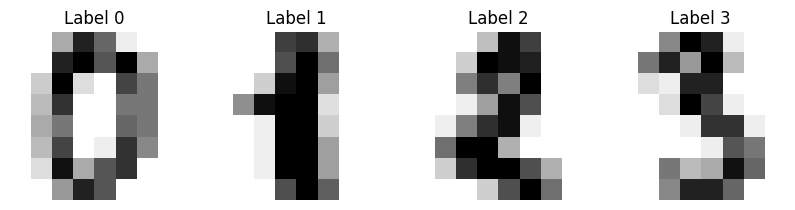

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Label %i" % label)

In [ ]:
# flatten the images
n = len(digits.images)
D = digits.images.reshape((n, -1))
y = digits.target

# Split data into 70% train and 30% test subsets
D_train, D_test, y_train, y_test = train_test_split(
    D, y, test_size=0.3, shuffle=False
)

###7a

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an RBF kernel SVM with specified gamma and C
clf = SVC(kernel='rbf', gamma=0.0005, C=0.9)

# Train the model
clf.fit(D_train, y_train)

# Predict the labels on the test set
y_pred = clf.predict(D_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9555555555555556

###7 b, c and d

In multiclass classification, the one-vs-one scheme involves training a separate SVM for every pair of classes. If there are N classes, this results in N*(N-1)/2 classifiers.

Support vectors are the data points that are closest to the decision boundary and are critical for defining the position and orientation of the decision boundary. The decision function in an SVM is based on these support vectors, and it's used to classify new examples. The prediction for a new data point is made based on which side of the decision boundary the point lies, and this is determined by the support vectors.

The prediction formula in SVM typically takes the form:

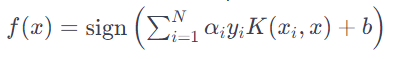

Here, x is a new data point you want to classify, xi are the support vectors, yi are the labels of the support vectors, αi are the learned coefficients that indicate the importance of each support vector, K is the kernel function (in this case, the Radial Basis Function or RBF kernel), and b is the bias term.

In the formula, the support vectors xi are specifically the data points for which the coefficient αi is non-zero. In sklearn, after fitting an SVM model, the support vectors can be accessed through the support_vectors_ attribute of the trained model object.

The kernel function transforms the input data into a higher-dimensional space where it may be easier to find a linear separation between classes. The RBF kernel, for example, is a popular choice because it can handle the case when the relation between class labels and attributes is nonlinear. The learned parameters in an SVM with an RBF kernel include the set of αi, the bias term b, and parameters of the kernel function itself, like gamma in the RBF kernel.

These parameters are determined during the training process and are crucial for making accurate predictions. They are fine-tuned based on the training data to provide the best separation between classes by maximizing the margin around the decision boundary.

To plot the support vectors and explain which are the most influential for the SVM in discriminating between classes 0 and 1, we need to look at the absolute values of the dual coefficients associated with each support vector. The most influential support vectors are typically those with the largest absolute values in the dual coefficients, as they are the closest to the decision boundary.

Let's move on to plotting the support vectors. We will select the four support vectors with the highest absolute dual coefficient values for each class and plot them.

Here are the most influential support vectors for classes 0 and 1, with four support vectors shown for each class. These support vectors are the ones with the largest absolute values in the dual coefficients, indicating their importance in the SVM's decision-making process. They are the ones closest to the decision boundary between the two classes.

In these images, you can observe the characteristics of the digits that the SVM model considers most ambiguous and thus most informative for determining the decision boundary. The support vectors for class 0 and class 1 should show features of their respective digits but may also share similarities that make them difficult to distinguish, which is why they are key in defining the separating hyperplane in the SVM model.

In [ ]:
# Filter out all classes except 0 and 1
D_train_binary = D_train[np.isin(y_train, [0, 1])]
y_train_binary = y_train[np.isin(y_train, [0, 1])]
D_test_binary = D_test[np.isin(y_test, [0, 1])]
y_test_binary = y_test[np.isin(y_test, [0, 1])]

# Train an RBF kernel SVM with given parameters
svm = SVC(kernel='rbf', gamma=0.0005, C=0.9, decision_function_shape='ovo')
svm.fit(D_train_binary, y_train_binary)

# The number of support vectors for the classifier between class 0 and 1
n_sv_0_1 = svm.n_support_

# The indices of support vectors for the classifier between class 0 and 1
# Since we are dealing with a binary classification for class 0 and 1, we can directly access the support_
sv_indices = svm.support_

# Extracting the actual support vectors for the classifier between class 0 and 1
sv_0_1 = svm.support_vectors_

# Output the requested information
n_sv_0_1, sv_indices, sv_0_1

(array([13, 18], dtype=int32),
 array([ 23,  43, 119, 127, 142, 160, 166, 172, 204, 215, 216, 237, 246,
         27,  35,  45,  79, 118, 124, 138, 149, 164, 169, 186, 189, 190,
        201, 218, 225, 250, 253], dtype=int32),
 array([[ 0.,  0.,  1., ..., 12.,  1.,  0.],
        [ 0.,  0.,  0., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ...,  3.,  0.,  0.],
        ...,
        [ 0.,  0., 13., ...,  3.,  0.,  0.],
        [ 0.,  0.,  1., ...,  0.,  0.,  0.],
        [ 0.,  0.,  3., ...,  0.,  0.,  0.]]))

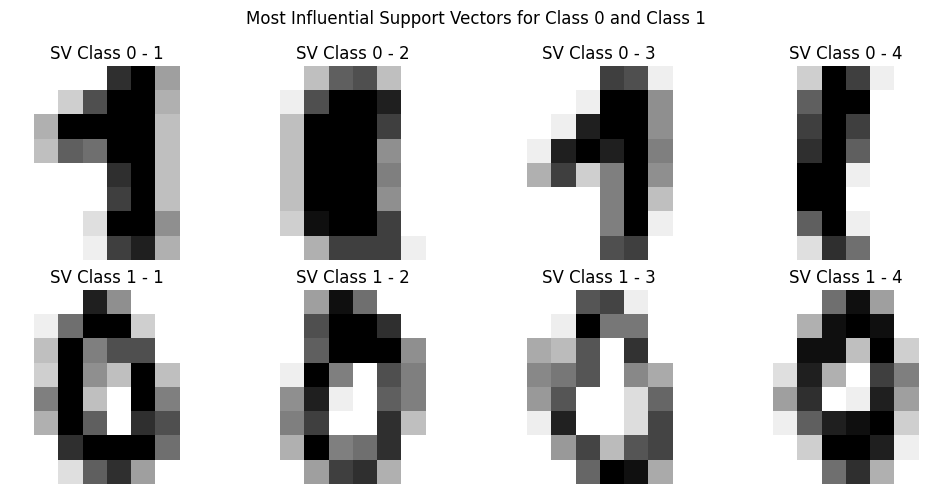

In [ ]:
import matplotlib.pyplot as plt

# Since we're working with a binary classification, the dual_coef_ will have only one row
# The positive coefficients correspond to class 0 and the negative to class 1
dual_coef_class_0 = svm.dual_coef_[0, svm.dual_coef_[0] > 0]
dual_coef_class_1 = -svm.dual_coef_[0, svm.dual_coef_[0] < 0]  # Make them positive for comparison

# Get the indices of the 4 most influential support vectors for each class
indices_sv_class_0 = np.argsort(dual_coef_class_0)[-4:]
indices_sv_class_1 = np.argsort(dual_coef_class_1)[-4:]

# Now we extract the most influential support vectors for each class
most_influential_sv_class_0 = sv_0_1[svm.dual_coef_[0] > 0][indices_sv_class_0]
most_influential_sv_class_1 = sv_0_1[svm.dual_coef_[0] < 0][indices_sv_class_1]

# Plotting the support vectors
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
fig.suptitle('Most Influential Support Vectors for Class 0 and Class 1')

# Plot the support vectors for class 0
for i, ax in enumerate(axes[0]):
    ax.imshow(most_influential_sv_class_0[i].reshape(8, 8), cmap=plt.cm.gray_r)
    ax.set_title(f"SV Class 0 - {i+1}")
    ax.axis('off')

# Plot the support vectors for class 1
for i, ax in enumerate(axes[1]):
    ax.imshow(most_influential_sv_class_1[i].reshape(8, 8), cmap=plt.cm.gray_r)
    ax.set_title(f"SV Class 1 - {i+1}")
    ax.axis('off')

plt.tight_layout()
plt.show()


###7e

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'gamma': [0.0001, 0.0005, 0.001, 0.005],
    'C': [0.6, 0.8, 1, 2, 4]
}

# Initialize the SVC with RBF kernel
svc = SVC(kernel='rbf')

# Setup the grid search
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')

# Train the model on the whole dataset
grid_search.fit(D, y)

# Extract the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

(best_params, best_score)

({'C': 4, 'gamma': 0.0005}, 0.9744073042401734)